In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Лабораторна робота 5.
## Варіант 6. Михайло Корешков.

In [2]:
def f(x):
    return x * np.tan(x)

A = -np.pi/3
B = np.pi/3
N = 10

In [3]:
X = np.linspace(A-0.1, B+0.1, 200)
Xtest = np.linspace(A-0.1, B+0.1, 50)
x_nodes = np.linspace(A, B, N)

y_nodes = f(x_nodes)
x_nodes

array([-1.04719755, -0.81448698, -0.58177642, -0.34906585, -0.11635528,
        0.11635528,  0.34906585,  0.58177642,  0.81448698,  1.04719755])

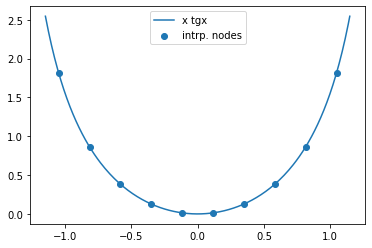

In [4]:
Y = f(X)
plt.plot(X, Y, label="x tgx")
plt.scatter(x_nodes, y_nodes, label="intrp. nodes")
plt.legend()

# 1. Lagrange

In [19]:
def calculate_lagrange(xs, ys):
    n = len(xs)
    C = []
    for k in range(0, n):
        c_k = 1
        for i in range(0, n):
            if i == k:
                continue
            c_k *= (xs[k] - xs[i])
        C.append( ys[k] / c_k )
        
    return C

def evaluate_lagrange(C, xs, ys, x, eps=1e-4):
    # d = np.abs(xs - x)
    # di, dm = np.argmin(d), np.min(d)
    # if dm < eps:
    #     return ys[di]
    
    n = len(C)
    y = 0
    for k in range(0,n):
        dx = 1
        for i in range(0, n):
            if i==k:
                continue
            dx *= (x - xs[i])
        y += C[k] * dx
    
    return y
    
    

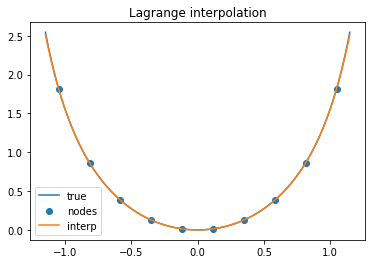

In [55]:
c1 = calculate_lagrange(x_nodes, y_nodes)

plt.plot(X, Y, label="true")

y1 = []
for x in X:
    y1.append(evaluate_lagrange(c1, x_nodes, y_nodes, x))

plt.scatter( x_nodes, y_nodes, label="nodes" )
plt.plot(X, y1, label="interp")
plt.title("Lagrange interpolation")
plt.legend()

Text(0.5, 1.0, 'Lagrange interpolation error')

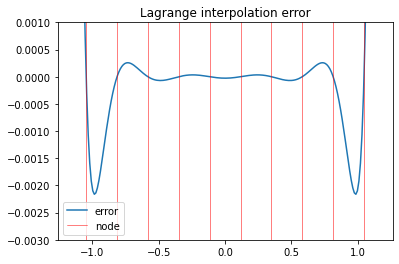

In [67]:
error1 = Y-y1
plt.plot(X, error1, label="error")
plt.axvline(x_nodes[0], lw=0.5, c='r', label='node')
for x in x_nodes[1:]:
    plt.axvline(x, lw=0.5, c='r')
plt.legend()
plt.ylim(-0.003, 0.001)
plt.title("Lagrange interpolation error")

In [8]:
max_error1 = np.abs(error1).max()
print("Max error:", max_error1)

Max error: 0.030806474220266278


# 2. Newton

In [40]:
def divdif(xs):
    if xs.shape[0] == 1:
        return f(xs)[0]
    
    if xs.shape[0] == 2:
        return (f(xs[1]) - f(xs[0])) / (xs[1] - xs[0])
    
    return (divdif(xs[1:]) - divdif(xs[:-1])) / (xs[-1] - xs[0])

In [53]:
def calculate_newton(x1, y1):
    n = len(x1)
    C = []
    
    for k in range(1,n+1):
        C.append(divdif(x1[:k]))
        
    return C

def evaluate_newton(C, x1, y1, x, eps=1e-4):
    # d = np.abs(xs - x)
    # di, dm = np.argmin(d), np.min(d)
    # if dm < eps:
    #     return ys[di]
    
    n = len(C)
    y = C[0]
    dx = 1
    for k in range(0, n-1):
        dx *= (x - x1[k])
        y += C[k+1] * dx
        
    return y

[1.8137993642342172, -4.084445366737072, 4.337873420758259, -3.2369016806731237, 2.299095473094213, -1.31359996313771, 0.7173542620331977, -0.30320426256323657, 0.16286554289296767, 2.5179391228252843e-16]


Text(0.5, 1.0, 'Newton interpolation')

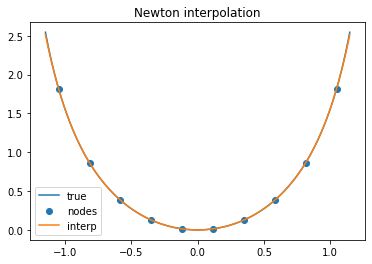

In [57]:
c2 = calculate_newton(x_nodes, y_nodes)
print(c2)
plt.plot(X, Y, label="true")

y2 = []
for x in X:
    y2.append(evaluate_newton(c2, x_nodes, y_nodes, x))

plt.scatter( x_nodes, y_nodes, label="nodes" )
plt.plot(X, y2, label="interp")
plt.legend()
plt.title("Newton interpolation")

Text(0.5, 1.0, 'Newton interpolation error')

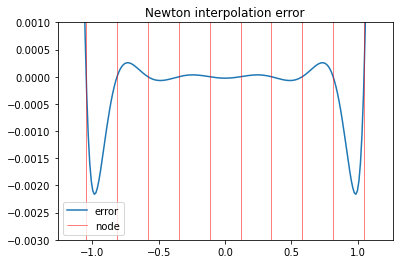

In [68]:
error2 = Y-y2
plt.plot(X, error2, label="error")
plt.axvline(x_nodes[0], lw=0.5, c='r', label='node')
for x in x_nodes[1:]:
    plt.axvline(x, lw=0.5, c='r')
plt.legend()
plt.ylim(-0.003, 0.001)
plt.title("Newton interpolation error")

In [69]:
max_error2 = np.abs(error2).max()
print("Max newton error:", max_error2)

Max newton error: 0.030806474220266278


# 3. Splines

In [70]:
# h_i = x_i - x_i-1
hi = x_nodes[1:] - x_nodes[:-1]

# ai = f(xi)
ai = y_nodes[:-1]

# c1 = 0; cn = 0; 


[0.23271057 0.23271057 0.23271057 0.23271057 0.23271057 0.23271057
 0.23271057 0.23271057 0.23271057]


In [73]:
def calculate_splines(n, x1, y1):
    AA = np.zeros((n,n))
    bb = np.zeros(n)
    
    a = np.zeros(n)
    b = np.zeros(n)
    c = np.zeros(n)
    d = np.zeros(n)
    h = np.zeros(n)
    
    a = y_nodes[:-1]
    h = x_nodes[1:] - x_nodes[:-1]
    
    A[0,0] = 1
    A[-1,-1] = 1
    
    for i in range(1,n-1):
        AA[i,i] = 2 * (h[i-1] + h[i])
        AA[i,i-1] = h[i-1]
        AA[i,i+1] = h[i]
        bb[i] = 3 * ( (y1[i+1]-y1[i])/h[i] - (y1[i] - y1[i-1])/h[i-1] )
        
    # progonka
    a1 = np.zeros(n)
    b1 = np.zeros(n)
    c1 = np.zeros(n)
    alp = np.zeros(n)
    bet = np.zeros(n)
    
    for i in range(n):
        for j in range(n):
            if j == i-1:
                a1[i] = AA[i,j]
            if j == i+1:
                c1[i] = AA[i,j]
        b1[i] = -AA[i,i]
    
    alp[0] = c1[0]/b1[0]
    bet[0] = -bb[0]/b1[0]
    
    for i in range(1,n):
        p = 1/( a1[i]*alp[i-1] - b1[i] )
        alp[i] = -c1[i] * p
        bet[i] = (bb[i] - a1[i]*bet[i-1]) * p 
    
    c[-1] = (bb[-1] - a1[-1]*bet[-2]) / (a1[-1]*alp[-2] - b1[-1])
    for i in range(n-2, -1, -1):
        c[i] = alp[i] * c[i+1] + bet[i]
        
    # end progonka
    
    for j in range(n-1):
        d[j] = (c[j+1] - c[j]) / (3 * h[j])
        b[j] = ((y1[j+1] - y1[j])/h[j]) - (h[j]/3) * (c[j+1] + 2*c[j])
    d[-1] = -c[-1]/(3*h[-1])
    b[-1] = ((y1[-1] - y1[-2])/h[-1]) - (2 * h[-1] * c[-1]) / 3

    return a, b, c, d

In [74]:
def evaluate_splines(n, a, b, c, d, x1, y1, x):
    I = -1
    for i in range(n):
        if x >= x1[i]:
            I = i
            break
    
    dx = x - x1[I]
    return a[I] + dx * (b[I] + dx * (c[I] + dx * d[I]) )